Label distribution after cleaning:
 label
0.0    4825
1.0     747
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to /home/yacine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Best Naive Bayes alpha: {'alpha': 0.1}
Best SVM C: {'C': 1}
Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

SVM Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.94      0.89      0.91       150

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



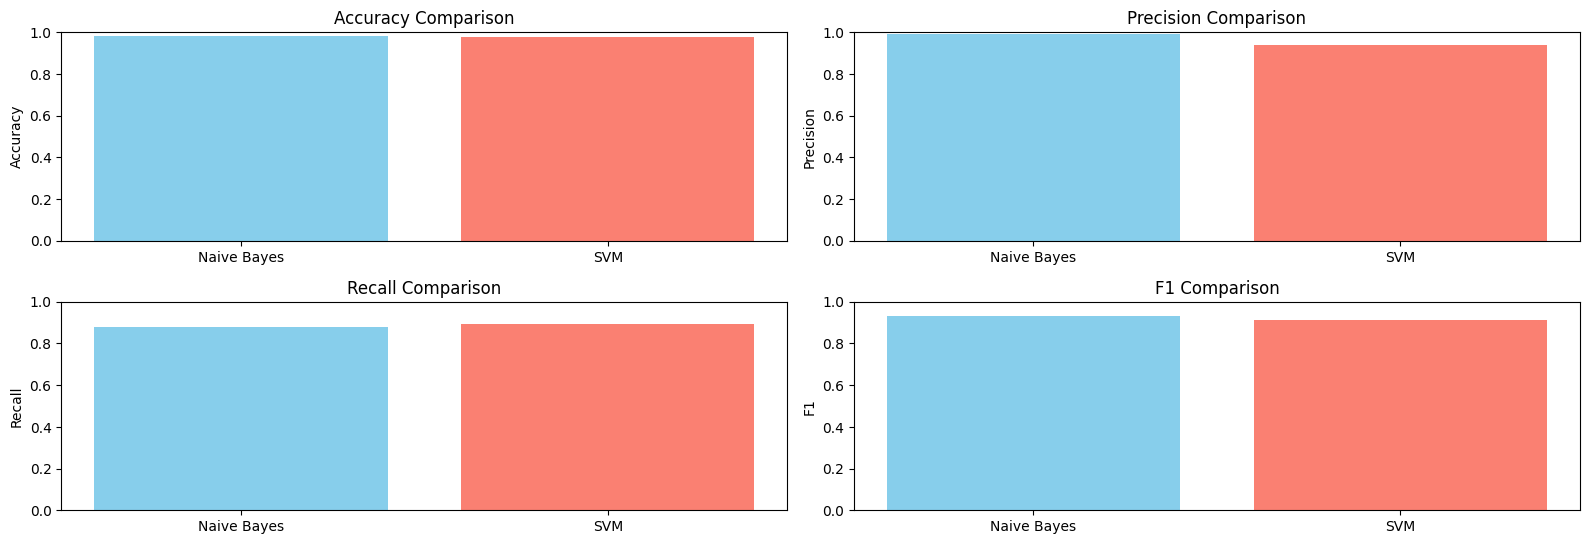


Model Comparison ⚖️ :
Naive Bayes: F1=0.93, Accuracy=0.98
SVM: F1=0.91, Accuracy=0.98


In [2]:
# spam_detection.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
import time
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load and preprocess dataset
def load_data(filepath):
    df = pd.read_csv(filepath, encoding='latin-1', usecols=[0, 1], names=['label', 'message'])
    df['label'] = df['label'].map({'ham': 0, 'spam': 1})
    df = df.dropna(subset=['label'])
    return df

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Preprocess data
def preprocess_data(df):
    df['cleaned_message'] = df['message'].apply(clean_text)
    X = df['cleaned_message']
    y = df['label'].astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1, 1))
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    return X_train_vec, X_test_vec, y_train, y_test, vectorizer

# Hyperparameter tuning with GridSearchCV
def grid_search_models(X_train, y_train):
    nb_params = {'alpha': [0.01, 0.1, 0.5, 1, 2]}
    nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='f1')
    nb_grid.fit(X_train, y_train)
    print("Best Naive Bayes alpha:", nb_grid.best_params_)

    svm_params = {'C': [0.1, 0.5, 1, 5, 10]}
    svm_grid = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), svm_params, cv=5, scoring='f1')
    svm_grid.fit(X_train, y_train)
    print("Best SVM C:", svm_grid.best_params_)

    models = {
        'Naive Bayes': nb_grid.best_estimator_,
        'SVM': svm_grid.best_estimator_
    }
    return models

# Train and evaluate models
def train_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        }
        print(f"{name} Report:\n{classification_report(y_test, y_pred)}")
    return results

def plot_results(results):

    metrics = ['accuracy', 'precision', 'recall', 'f1']
    models = list(results.keys())

    fig, axes = plt.subplots(3, 2, figsize=(16, 8))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        values = [results[model][metric] for model in models]
        axes[i].bar(models, values, color=['skyblue', 'salmon'])
        axes[i].set_title(f'{metric.capitalize()} Comparison')
        axes[i].set_ylim(0, 1)
        axes[i].set_ylabel(metric.capitalize())

    # Hide the extra empty subplot (if 5th or 6th exists)
    for j in range(len(metrics), 6):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


# Predict on custom input
def predict_custom(model, vectorizer):
    text = input("Enter a message to check ➡️ : ")
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    print("🚨 Spam!" if prediction[0] == 1 else "✅ Not Spam.")

if __name__ == "__main__":
    df = load_data('spam.csv')
    print("Label distribution after cleaning:\n", df['label'].value_counts())
    X_train, X_test, y_train, y_test, vectorizer = preprocess_data(df)

    # Grid Search to get best models
    models = grid_search_models(X_train, y_train)

    # Train and evaluate
    results = train_evaluate(models, X_train, X_test, y_train, y_test)

    plot_results(results)
    # Compare performance with plots
    print("\nModel Comparison ⚖️ :")
    for model, metrics in results.items():
        print(f"{model}: F1={metrics['f1']:.2f}, Accuracy={metrics['accuracy']:.2f}")

    

**Macro avg:** simple mean of each class’s score (treats classes equally)

**Weighted avg:** average weighted by the number of samples in each class (reflects data imbalance)

# Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
import time
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/yacine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1️⃣ load_data

1. Loads the dataset from a CSV file.

2. Maps ‘ham’ to 0, ‘spam’ to 1

3. Removes missing values.

In [3]:
def load_data(filepath):
    df = pd.read_csv(filepath, encoding='latin-1', usecols=[0, 1], names=['label', 'message'])
    df['label'] = df['label'].map({'ham': 0, 'spam': 1})
    df = df.dropna(subset=['label'])
    return df

# 2️⃣ clean_text
1. Lowercases text.

2. Removes punctuation.

3. Removes stopwords (common words like “the”, “is”, “and”).

In [4]:
def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# 3️⃣ preprocess_data
1. Cleans all text messages.

2. Splits into train/test sets.

3. Converts text into TF-IDF numbers (up to 5000 unique words).

4. Returns vectorized data and labels.

In [5]:
def preprocess_data(df):
    df['cleaned_message'] = df['message'].apply(clean_text)
    X = df['cleaned_message']
    y = df['label'].astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1, 1))
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    return X_train_vec, X_test_vec, y_train, y_test, vectorizer

# 4️⃣ grid_search_models
Finds best hyperparameters for:

1. Naive Bayes → chooses best alpha.

2. SVM → chooses best C.

3. Uses GridSearchCV (tries all values and picks the best based on F1 score).

In [6]:
def grid_search_models(X_train, y_train):
    nb_params = {'alpha': [0.01, 0.1, 0.5, 1, 2]}
    nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='f1')
    nb_grid.fit(X_train, y_train)
    print("Best Naive Bayes alpha:", nb_grid.best_params_)

    svm_params = {'C': [0.1, 0.5, 1, 5, 10]}
    svm_grid = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), svm_params, cv=5, scoring='f1')
    svm_grid.fit(X_train, y_train)
    print("Best SVM C:", svm_grid.best_params_)

    models = {
        'Naive Bayes': nb_grid.best_estimator_,
        'SVM': svm_grid.best_estimator_
    }
    return models

# 5️⃣ train_evaluate
1. Trains both models.

2. Tests them on test data.

3. Prints precision, recall, F1.

4. Returns results.

In [7]:
def train_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        }
        print(f"{name} Report:\n{classification_report(y_test, y_pred)}")
    return results

# 6️⃣ plot_results
Makes bar plots comparing model performance on:

1. Accuracy

2. Precision

3. Recall

4. F1 Score

In [8]:
def plot_results(results):

    metrics = ['accuracy', 'precision', 'recall', 'f1']
    models = list(results.keys())

    fig, axes = plt.subplots(3, 2, figsize=(16, 8))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        values = [results[model][metric] for model in models]
        axes[i].bar(models, values, color=['skyblue', 'salmon'])
        axes[i].set_title(f'{metric.capitalize()} Comparison')
        axes[i].set_ylim(0, 1)
        axes[i].set_ylabel(metric.capitalize())

    # Hide the extra empty subplot (if 5th or 6th exists)
    for j in range(len(metrics), 6):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# 7️⃣ predict_custom
1. Lets you type a message.

2. Cleans it.

3. Converts it to TF-IDF.

4. Predicts if it’s spam or ham.

In [9]:
def predict_custom(model, vectorizer):
    text = input("Enter a message to check ➡️ : ")
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    print("🚨 Spam!" if prediction[0] == 1 else "✅ Not Spam.")

# Main :
1.   **Load data**
2.   **Define models**
3.   **Training and Evaluating models**
4.  **Compare performance**


Label distribution after cleaning:
 label
0.0    4825
1.0     747
Name: count, dtype: int64
Best Naive Bayes alpha: {'alpha': 0.1}
Best SVM C: {'C': 1}
Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

SVM Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.94      0.89      0.91       150

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



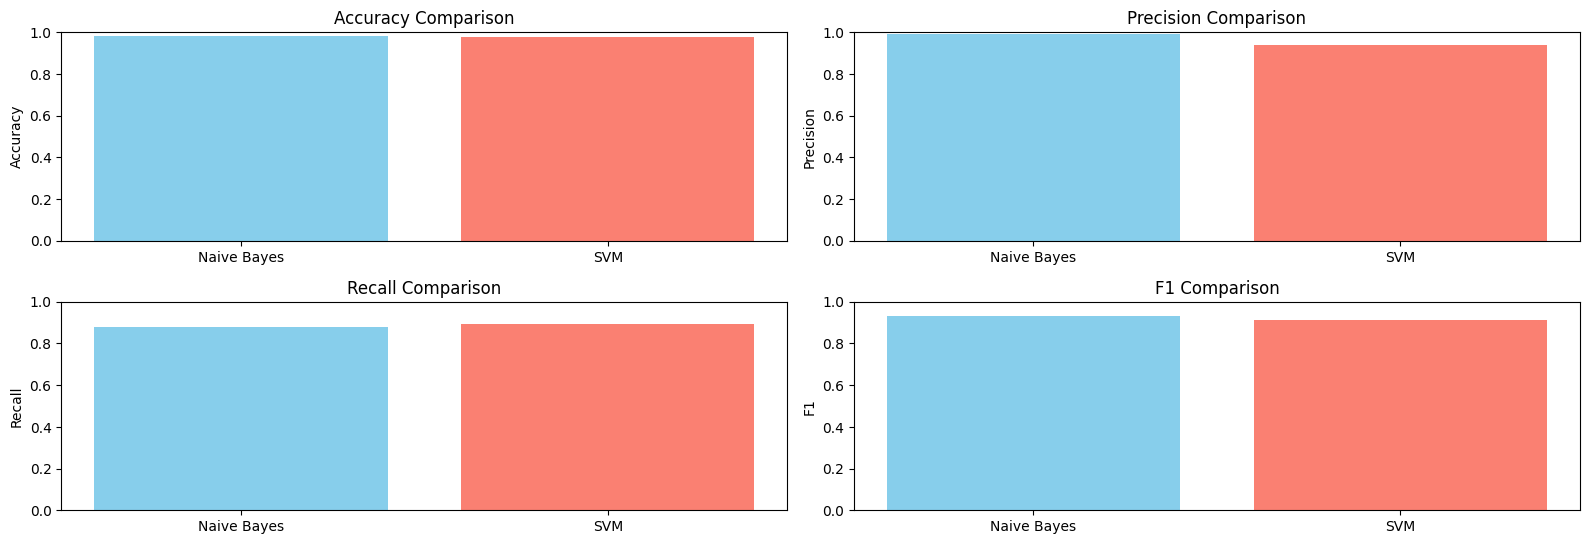


Model Comparison ⚖️ :
Naive Bayes: F1=0.93, Accuracy=0.98
SVM: F1=0.91, Accuracy=0.98


In [10]:
if __name__ == "__main__":
    df = load_data('spam.csv')
    print("Label distribution after cleaning:\n", df['label'].value_counts())
    X_train, X_test, y_train, y_test, vectorizer = preprocess_data(df)

    # Grid Search to get best models
    models = grid_search_models(X_train, y_train)

    # Train and evaluate
    results = train_evaluate(models, X_train, X_test, y_train, y_test)

    plot_results(results)
    # Compare performance with plots
    print("\nModel Comparison ⚖️ :")
    for model, metrics in results.items():
        print(f"{model}: F1={metrics['f1']:.2f}, Accuracy={metrics['accuracy']:.2f}")

**Dataset after cleaning**

In [15]:
    df.head()

,label,message,cleaned_message
1,0.0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
2,0.0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
4,0.0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
5,0.0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


**Weight and Bias of svm**

In [11]:
    svm_model = models['SVM']
    weights = svm_model.coef_
    bias = svm_model.intercept_[0]
    print("SVM Weights:\n", weights)
    print("SVM Bias:\n", bias)

SVM Weights:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3212 stored elements and shape (1, 5000)>
  Coords	Values
  (0, 4589)	0.29180378578654736
  (0, 3104)	0.29180378578654736
  (0, 769)	0.29180378578654736
  (0, 319)	0.3183799320688635
  (0, 203)	0.33392598105769833
  (0, 67)	0.28589345226503143
  (0, 3797)	0.8847895423266795
  (0, 3529)	0.44239477116333975
  (0, 3240)	0.44239477116333975
  (0, 557)	0.44239477116333975
  (0, 448)	0.44239477116333975
  (0, 135)	0.2746419939646667
  (0, 4326)	0.3649473113996388
  (0, 4097)	0.3649473113996388
  (0, 3881)	0.35640918594368665
  (0, 2954)	0.3649473113996388
  (0, 2571)	0.3649473113996388
  (0, 1538)	0.34919030373014315
  (0, 1438)	0.35640918594368665
  (0, 85)	0.3649473113996388
  (0, 94)	0.29190045772687817
  (0, 4942)	0.15104796110751645
  (0, 4870)	0.15104796110751645
  (0, 4996)	0.05836611044337548
  (0, 1101)	0.05222551649404896
  :	:
  (0, 2418)	-0.24999298147452892
  (0, 2412)	-0.2183780371113249
  (0, 2410)	0.5

**1. First with SVM**

In [3]:
    predict_custom(models['SVM'], vectorizer)

Enter a message to check ➡️ :  Dear user,  You have been selected for an exclusive opportunity to receive financial assistance of up to $5,000. This program is part of a limited-time campaign to support individuals around the world. No registration required.  Reply immediately to confirm your eligibility and claim your benefit.  This opportunity expires in 24 hours.  Regards, The Global Support Initiative


🚨 Spam!


**2. Second with Naive Bayes**

In [4]:
    predict_custom(models['Naive Bayes'], vectorizer)

Enter a message to check ➡️ :  Dear user,  You have been selected for an exclusive opportunity to receive financial assistance of up to $5,000. This program is part of a limited-time campaign to support individuals around the world. No registration required.  Reply immediately to confirm your eligibility and claim your benefit.  This opportunity expires in 24 hours.  Regards, The Global Support Initiative


🚨 Spam!
